# Figure 3b,c

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

import phate
import proplot as pplt
import matplotlib
import matplotlib.colors as mcolors
import scprep
import scipy
import seaborn
from scipy.stats import pearsonr
from scipy.stats import zscore
from sklearn.decomposition import PCA

pd. set_option('display.max_columns', 60)
pd. set_option('display.max_rows', 100) 

In [ ]:
#Generation of EMD-PHATE and heatmaps in Figure 3b,c
all_data = pd.read_csv('/....../df_gd_all.txt', sep='\t')
all_data.head()

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,DNA_1,DNA_2,194_Cisplatin,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,2.112668,1.072871,1.784029,36.151936,0.732375,0.000000,1.565820,2.242769,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,1188.507935,2177.531006,21.608774,5.084100,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,0.527830,0.000000,0.000000,40.617779,0.000000,0.850179,0.000000,2.896378,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,1148.690063,2135.051025,11.153146,0.000000,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,0.000000,0.272097,1.360897,12.533136,0.000000,0.000000,0.000000,2.684406,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,1070.468506,1976.926392,16.781635,0.542236,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,0.000000,0.052713,0.000000,33.661613,0.000000,0.317290,0.000000,0.166774,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,833.138000,1527.750000,15.340094,1.247573,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,0.000000,0.425003,0.033936,72.471931,1.903905,3.386223,0.391445,0.000000,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,972.849915,1659.628662,3.891569,0.850994,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,0.000000,0.000000,30.944431,1.578278,4.320772,0.209392,2.607019,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1601.611450,2732.432861,31.009453,1.381068,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,0.000000,0.000000,0.000000,25.492655,1.366826,0.000000,0.807238,0.000000,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000

In [3]:
pre_data = all_data.drop([

 'RFP',
 'Anti-mCherry',
 'EpCAM',
 'PanCK',
    'DNA_1',
    'DNA_2',
    '194_Cisplatin',
    'Date',
    'Patient',
    'Culture',
    'Transduction',
    'Treatment',
    'Replicate',
    'Time',
    'Cell_type',
    'gd_donor',
    'Batch',    
    
],axis=1, inplace=False)
pre_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,2.112668,36.151936,0.732375,1.565820,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,5.084100
1,0.527830,40.617779,0.000000,0.000000,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,0.000000
2,0.000000,12.533136,0.000000,0.000000,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,0.542236
3,0.000000,33.661613,0.000000,0.000000,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,1.247573
4,0.000000,72.471931,1.903905,0.391445,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,0.850994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,30.944431,1.578278,0.209392,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1.381068
5819341,0.000000,25.492655,1.366826,0.807238,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000000,44.193893,14.579997,11.834751,30.874540,2.222952,593.606873,33.942799,0.000000,5.484707,1.107356,41.650654,4.079612,2.890662,16.442080,211.754593,41.139343,0.167057,21.065989,0.932406,52.263050,7.510569,4.690210,4.869834,318.626892,14.122758,0.000000,2.388915,0.000000
5819342,0.000000,24.976599,8.353419,0.000000,0.471833,0.000000,0.000000,20.350275,66.372398,6.817601,2.872206,0.000000,10.188087,13.935201,0.000000,27.215403,0.000000,5.833886,1.988676,0.000000,265.788788,49.861317,4.957391,1.605252,0.000000,29.015533,13.465952,0.000000,7.995706,114.426605,14.433770,0.581513,22.458857,1.111541,3.334839,6.933015,1.609262,11.135314,24.247538,4.874505,0.187084,1.576167,2.325908
5819343,2.175176,31.664440,1.766799,7.169693,2.741029,0.000000,0.000000,46.702705,63.867626,25.045683,5.710142,3091.138916,22.184875,51.588818,0.000000,60.380390,22.572739,18.771585,6.463361,2.874717,327.258179,53.740910,5.749938,13.937111,3.208147,60.760220,0.0000

In [4]:
metadata = all_data.filter(['Date','Patient','Culture','gd_donor','Transduction','Treatment','Replicate','Time','Batch','Cell_type'])
metadata['Batch'] = metadata['Batch'].apply(str)
metadata['gd_donor'] = metadata['gd_donor'].apply(str)
metadata['Patient'] = metadata['Patient'].apply(str)
metadata['Treatment'] = metadata['Treatment'].apply(str)
metadata['Transduction'] = metadata['Transduction'].apply(str)
metadata  

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...
5819340,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819342,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819343,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds


In [5]:
subset_pre_data = pre_data.loc[(metadata['Patient'].isin(['X','5','11','21','23','27','75','99','109','141','216'])) & (metadata['gd_donor'].isin(['A','B','E','7'])) 
& (metadata['Transduction'].isin(['eGFP-stIL15'])) & (metadata['Treatment'].isin(['BM','B7C18'])) & (metadata['Batch'].isin(['Batch2','Batch4','Batch6','Batch7','Batch8']))]
subset_pre_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
477202,0.000000,34.707291,0.000000,0.000000,0.000000,0.000000,0.000000,21.658829,472.923370,23.141352,8.601446,22.103407,31.870472,47.424408,0.018484,12.103301,7.392933,11.060347,24.470173,35.526260,1161.258667,30.991314,0.000000,12.368027,16.073236,53.671825,0.000000,6.008776,22.241764,240.674149,87.260948,5.924499,3.945853,0.000000,5.440267,35.751488,8.804577,4.400812,29.169230,5.635969,7.820054,21.629023,0.000000
477203,0.000000,14.157574,0.000000,0.000000,0.000000,0.000000,0.000000,13.882650,296.851440,16.756283,12.612571,3.255828,12.925344,26.254704,0.000000,23.200035,0.000000,13.703773,1.997243,24.343845,792.608154,9.255106,0.000000,7.052355,6.512354,27.114666,0.000000,0.110017,2.845665,224.595200,59.615730,11.540479,19.132288,0.000000,7.207807,6.978939,0.000000,0.000000,18.350615,0.000000,5.480089,6.748727,0.000000
477204,0.000000,462.014740,1.668110,0.000000,1.507814,3.138901,0.000000,11.260657,101.655289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.334311,0.000000,0.000000,1.588589,4.981578,216.276596,2.870738,0.000000,0.000000,10.847421,5.684055,0.000000,5.039053,12.555069,141.495621,20.588900,0.000000,0.000000,0.000000,0.271760,13.388305,6.980832,0.000000,26.652905,2.816440,6.579736,8.827875,2.147535
477205,0.000000,22.172516,1.283391,0.000000,0.812709,0.438123,0.000000,18.864975,200.602661,7.845024,5.418871,23.692860,7.627847,17.806017,3.561880,20.336231,0.000000,9.560737,5.191366,0.000000,637.622314,6.697829,0.000000,34.707542,3.337770,4.039658,0.000000,0.000000,12.394520,162.817825,18.507847,0.000000,0.000000,0.000000,11.461474,18.406147,0.000000,4.399421,18.399115,0.000000,8.413734,3.453521,4.314132
477206,0.000000,23.359049,0.000000,0.000000,0.000000,0.000000,0.251297,2.745977,81.909645,0.000000,0.000000,0.000000,8.400867,10.778749,3.622564,20.252939,0.000000,1.076861,68.665955,21.521221,294.875244,13.426810,0.000000,3.656691,4.978725,16.354219,0.000000,0.000000,1.353185,109.419586,10.813177,0.000000,6.957262,0.000000,0.000000,4.159170,0.000000,12.133100,10.652521,0.000000,0.000000,1.877119,0.183443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,0.000000,28.875036,0.000000,0.000000,0.000000,1.075896,1.556081,18.458279,110.446426,0.110063,0.000000,1.561231,5.253989,15.427156,0.000000,23.203382,0.781385,7.251719,0.403637,0.706380,391.153107,42.786880,5.704473,1.420541,11.239607,18.273808,0.452530,0.000000,14.336119,134.614746,6.235890,0.000000,2.107930,0.000000,3.945314,5.040523,2.196426,1.767620,19.031973,0.000000,6.412177,0.917294,0.000000
5382523,0.000000,3.801827,1.189538,0.000000,6.091892,0.000000,0.000000,29.470259,220.379868,4.792118,17.330170,8.546122,15.475215,16.007704,0.000000,17.011972,0.000000,16.371639,0.788106,0.023557,508.026337,9.662008,0.000000,0.000000,9.376084,13.658239,0.000000,0.383715,2.928666,278.672150,50.677357,0.087827,10.470968,0.000000,1.934739,12.934807,4.684712,0.000000,16.418653,3.321466,1.956694,7.711249,0.000000
5382524,0.000000,51.180542,0.000000,0.000000,0.000000,4.040262,0.000000,2.260488,91.769936,3.831644,0.000000,36.118465,5.222328,32.752560,0.000000,18.954603,0.000000,6.867979,10.537904,1.168641,307.091980,41.874817,2.923684,3.059006,4.524865,7.214482,0.000000,4.725778,2.936836,118.396957,7.571368,0.089310,39.727184,2.572815,0.642275,4.521135,0.193477,54.202286,14.061462,1.303217,0.562369,0.000000,0.000000
5382525,0.547464,38.701290,0.648193,0.000000,0.000000,0.000000,0.000000,4.264005,118.641479,6.323226,0.000000,14.799616,12.604033,11.217786,0.000000,32.132008,0.000000,6.986883,13.770410,1.540707,420.078522,92.301033,6.741317,17.608044,1.902665,12.46898

In [6]:
subset_metadata = metadata.loc[(metadata['Patient'].isin(['X','5','11','21','23','27','75','99','109','141','216'])) & (metadata['gd_donor'].isin(['A','B','E','7'])) 
& (metadata['Transduction'].isin(['eGFP-stIL15'])) & (metadata['Treatment'].isin(['BM','B7C18'])) & (metadata['Batch'].isin(['Batch2','Batch4','Batch6','Batch7','Batch8']))]
subset_metadata

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
477202,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477203,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477204,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477205,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477206,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
...,...,...,...,...,...,...,...,...,...,...
5382522,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382523,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382524,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382525,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds


In [7]:
as_data = np.arcsinh(subset_pre_data/5)
as_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
477202,0.000000,2.635808,0.000000,0.000000,0.000000,0.000000,0.000000,2.172187,5.242671,2.236802,1.311062,2.191995,2.551486,2.945614,0.003697,1.617355,1.182826,1.534643,2.291442,2.658897,6.140974,2.523861,0.000000,1.637384,1.884223,3.068760,0.000000,1.017096,2.198082,4.567261,3.553432,1.006270,0.724190,0.000000,0.942287,2.665155,1.331301,0.794049,2.464090,0.968516,1.229753,2.170845,0.000000
477203,0.000000,1.763776,0.000000,0.000000,0.000000,0.000000,0.000000,1.745306,4.777012,1.924034,1.655560,0.612201,1.678370,2.360501,0.000000,2.239278,0.000000,1.733113,0.389523,2.286372,5.759048,1.374954,0.000000,1.144053,1.079957,2.392179,0.000000,0.022002,0.542177,4.498133,3.173383,1.573502,2.051740,0.000000,1.161904,1.135531,0.000000,0.000000,2.011436,0.000000,0.947666,1.108421,0.000000
477204,0.000000,5.219335,0.327724,0.000000,0.297170,0.592500,0.000000,1.551023,3.705901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.058084,0.000000,0.000000,0.312602,0.878766,4.460401,0.546531,0.000000,0.000000,1.516960,0.974883,0.000000,0.886886,1.651314,4.036290,2.122890,0.000000,0.000000,0.000000,0.054325,1.711265,1.135752,0.000000,2.375292,0.537091,1.088137,1.333599,0.417291
477205,0.000000,2.195040,0.253940,0.000000,0.161834,0.087513,0.000000,2.038133,4.385191,1.232441,0.939388,2.259835,1.208863,1.982400,0.662776,2.110894,0.000000,1.403642,0.908180,0.000000,5.541471,1.102346,0.000000,2.635815,0.625883,0.738850,0.000000,0.000000,1.639368,4.176577,2.019670,0.000000,0.000000,0.000000,1.567202,2.014352,0.000000,0.793840,2.013983,0.000000,1.292040,0.645034,0.780979
477206,0.000000,2.245956,0.000000,0.000000,0.000000,0.000000,0.050238,0.524775,3.490256,0.000000,0.000000,0.000000,1.290724,1.511196,0.672633,2.106909,0.000000,0.213741,3.314286,2.165978,4.770334,1.713956,0.000000,0.678151,0.878362,1.900784,0.000000,0.000000,0.267438,3.779421,1.514089,0.000000,1.133004,0.000000,0.000000,0.757334,0.000000,1.619628,1.500521,0.000000,0.000000,0.367121,0.036680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,0.000000,2.454100,0.000000,0.000000,0.000000,0.213552,0.306400,2.017081,3.788752,0.022011,0.000000,0.307383,0.916841,1.845122,0.000000,2.239419,0.155648,1.166899,0.080640,0.140810,5.052849,2.843337,0.977578,0.280419,1.549313,2.007390,0.090383,0.000000,1.775601,3.986471,1.045829,0.000000,0.410002,0.000000,0.724105,0.887093,0.426259,0.346546,2.046654,0.000000,1.067696,0.182445,0.000000
5382523,0.000000,0.701419,0.235719,0.000000,1.027686,0.000000,0.000000,2.474211,4.479191,0.851667,1.956347,1.305488,1.848081,1.880323,0.000000,1.938555,0.000000,1.901802,0.156976,0.004711,5.314267,1.412989,0.000000,0.000000,1.386396,1.729987,0.000000,0.076668,0.556553,4.713826,3.011613,0.017565,1.484984,0.000000,0.377890,1.679052,0.836075,0.000000,1.904545,0.623169,0.381982,1.217973,0.000000
5382524,0.000000,3.021446,0.000000,0.000000,0.000000,0.738944,0.000000,0.437962,3.603735,0.706159,0.000000,2.675270,0.912469,2.578466,0.000000,2.042715,0.000000,1.122538,1.490737,0.231651,4.810923,2.821939,0.555693,0.578918,0.812559,1.162665,0.000000,0.842056,0.557962,3.858198,1.202655,0.017861,2.769682,0.494199,0.128104,0.812006,0.038686,3.078553,1.757355,0.257779,0.112238,0.000000,0.000000
5382525,0.109275,2.743729,0.129278,0.000000,0.000000,0.000000,0.000000,0.773370,3.860259,1.056709,0.000000,1.805696,1.654931,1.547538,0.000000,2.559561,0.000000,1.136456,1.737672,0.303462,5.124186,3.609497,1.107538,1.971640,0.371901,1.644925,0.242105,0.976251,1.619874,4.138278,1.632543,0.000000,0.000000,0.157120,0.814651,1.389471,0.000000,2.067664,2.437632,0.378945,0.000000,0.280705,0.000

In [8]:
as_data_centered = scprep.normalize.batch_mean_center(as_data,sample_idx=subset_metadata['Batch'])
as_data_centered

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
477202,-0.140386,0.413206,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,0.416562,0.980627,1.246703,0.330997,0.575192,0.702875,0.853944,-0.409154,-0.853917,0.608659,0.334246,0.654933,1.716307,0.706196,0.286645,-0.547431,0.936228,0.774740,0.753063,-0.241373,-0.118528,1.156078,0.060500,0.505906,0.688767,-0.873187,-0.209047,-0.085485,0.672520,0.396542,-0.062492,-0.421011,0.183661,0.298445,0.760262,-0.311691
477203,-0.140386,-0.458826,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-0.010319,0.514969,0.933935,0.675495,-1.004601,-0.170242,0.268831,-0.412851,-0.231994,-0.574167,0.532716,-1.246986,1.343782,0.324270,-0.862263,-0.547431,0.442897,-0.029527,0.076482,-0.241373,-1.113622,-0.499827,-0.008628,0.125857,1.255998,0.454364,-0.209047,0.134132,-0.857104,-0.934759,-0.856541,-0.873665,-0.784855,0.016357,-0.302162,-0.311691
477204,-0.140386,2.996734,0.104538,-0.163049,-0.249162,-0.844378,-0.096904,-0.204601,-0.556142,-0.990099,-0.980065,-1.616803,-1.848612,-2.091670,-0.412851,-1.413188,-0.574167,-1.200398,-1.323908,-0.063824,-0.974377,-1.690686,-0.547431,-0.701156,0.407477,-1.340813,-0.241373,-0.248738,0.609310,-0.470471,-0.924636,-0.317503,-1.597376,-0.209047,-0.973447,-0.281370,0.200993,-0.856541,-0.509809,-0.247764,0.156829,-0.076984,0.105600
477205,-0.140386,-0.027562,0.030754,-0.163049,-0.384498,-1.349365,-0.096904,0.282508,0.123147,0.242341,-0.040677,0.643033,-0.639748,-0.109270,0.249925,-0.360377,-0.574167,0.203244,-0.728330,-0.942590,0.106693,-1.134870,-0.547431,1.934659,-0.483600,-1.576847,-0.241373,-1.135624,0.597364,-0.330184,-1.027856,-0.317503,-1.597376,-0.209047,0.539430,0.021716,-0.934759,-0.062701,-0.871118,-0.784855,0.360731,-0.765549,0.469289
477206,-0.140386,0.023354,-0.223186,-0.163049,-0.546332,-1.436878,-0.046666,-1.230849,-0.771787,-0.990099,-0.980065,-1.616803,-0.557887,-0.580474,0.259782,-0.364362,-0.574167,-0.986657,1.677776,1.223388,-0.664445,-0.523261,-0.547431,-0.023005,-0.231122,-0.414913,-0.241373,-1.135624,-0.774566,-0.727340,-1.533437,-0.317503,-0.464372,-0.209047,-1.027772,-1.235301,-0.934759,0.763087,-1.384580,-0.784855,-0.931308,-1.043462,-0.275010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,-0.132664,-0.173592,-0.267071,-0.175566,-0.562524,-0.990324,0.131272,-0.391798,-0.394082,-1.006824,-1.208338,-1.206515,-0.614713,-0.546354,-0.207593,-0.335294,-0.347780,-0.125344,-1.367895,-0.965830,-0.238534,-0.092704,0.212711,-0.471223,0.444360,-0.118292,-0.205120,-0.833224,0.572199,-0.452067,-0.958368,-0.287631,-0.972362,-0.175471,-0.350205,-0.672675,-0.476366,-1.091025,-0.980610,-0.693997,0.529325,-0.586989,-0.176579
5382523,-0.132664,-1.926273,-0.031352,-0.175566,0.465162,-1.203876,-0.175128,0.065332,0.296357,-0.177168,0.748009,-0.208409,0.316527,-0.511153,-0.207593,-0.636158,-0.503427,0.609559,-1.291560,-1.101929,0.022884,-1.523052,-0.764867,-0.751641,0.281443,-0.395695,-0.295503,-0.756557,-0.646850,0.275288,1.007416,-0.270066,0.102619,-0.175471,-0.696420,0.119285,-0.066551,-1.437571,-1.122719,-0.070828,-0.156389,0.448539,-0.176579
5382524,-0.132664,0.393754,-0.267071,-0.175566,-0.562524,-0.464932,-0.175128,-1.970917,-0.579099,-0.322676,-1.208338,1.161373,-0.619085,0.186990,-0.207593,-0.531998,-0.503427,-0.169705,0.042202,-0.874990,-0.480460,-0.114102,-0.209174,-0.172723,-0.292395,-0.963018,-0.295503,0.008832,-0.645440,-0.580340,-0.801542,-0.269770,1.387317,0.318729,-0.946205,-0.747762,-0.863940,1.640982,-1.269909,-0.436218,-0.426133,-0.769434,-0.176579
5382525,-0.023388,0.116037,-0.137793,-0.175566,-0.562524,-1.203876,-0.175128,-1.635509,-0.322575,0.027874,-1.208338,0.291799,0.123377,-0.84

In [9]:
data_as_meta = pd.concat([as_data_centered, subset_metadata], axis=1)
data_as_meta

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
477202,-0.140386,0.413206,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,0.416562,0.980627,1.246703,0.330997,0.575192,0.702875,0.853944,-0.409154,-0.853917,0.608659,0.334246,0.654933,1.716307,0.706196,0.286645,-0.547431,0.936228,0.774740,0.753063,-0.241373,-0.118528,1.156078,0.060500,0.505906,0.688767,-0.873187,-0.209047,-0.085485,0.672520,0.396542,-0.062492,-0.421011,0.183661,0.298445,0.760262,-0.311691,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477203,-0.140386,-0.458826,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-0.010319,0.514969,0.933935,0.675495,-1.004601,-0.170242,0.268831,-0.412851,-0.231994,-0.574167,0.532716,-1.246986,1.343782,0.324270,-0.862263,-0.547431,0.442897,-0.029527,0.076482,-0.241373,-1.113622,-0.499827,-0.008628,0.125857,1.255998,0.454364,-0.209047,0.134132,-0.857104,-0.934759,-0.856541,-0.873665,-0.784855,0.016357,-0.302162,-0.311691,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477204,-0.140386,2.996734,0.104538,-0.163049,-0.249162,-0.844378,-0.096904,-0.204601,-0.556142,-0.990099,-0.980065,-1.616803,-1.848612,-2.091670,-0.412851,-1.413188,-0.574167,-1.200398,-1.323908,-0.063824,-0.974377,-1.690686,-0.547431,-0.701156,0.407477,-1.340813,-0.241373,-0.248738,0.609310,-0.470471,-0.924636,-0.317503,-1.597376,-0.209047,-0.973447,-0.281370,0.200993,-0.856541,-0.509809,-0.247764,0.156829,-0.076984,0.105600,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477205,-0.140386,-0.027562,0.030754,-0.163049,-0.384498,-1.349365,-0.096904,0.282508,0.123147,0.242341,-0.040677,0.643033,-0.639748,-0.109270,0.249925,-0.360377,-0.574167,0.203244,-0.728330,-0.942590,0.106693,-1.134870,-0.547431,1.934659,-0.483600,-1.576847,-0.241373,-1.135624,0.597364,-0.330184,-1.027856,-0.317503,-1.597376,-0.209047,0.539430,0.021716,-0.934759,-0.062701,-0.871118,-0.784855,0.360731,-0.765549,0.469289,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477206,-0.140386,0.023354,-0.223186,-0.163049,-0.546332,-1.436878,-0.046666,-1.230849,-0.771787,-0.990099,-0.980065,-1.616803,-0.557887,-0.580474,0.259782,-0.364362,-0.574167,-0.986657,1.677776,1.223388,-0.664445,-0.523261,-0.547431,-0.023005,-0.231122,-0.414913,-0.241373,-1.135624,-0.774566,-0.727340,-1.533437,-0.317503,-0.464372,-0.209047,-1.027772,-1.235301,-0.934759,0.763087,-1.384580,-0.784855,-0.931308,-1.043462,-0.275010,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,-0.132664,-0.173592,-0.267071,-0.175566,-0.562524,-0.990324,0.131272,-0.391798,-0.394082,-1.006824,-1.208338,-1.206515,-0.614713,-0.546354,-0.207593,-0.335294,-0.347780,-0.125344,-1.367895,-0.965830,-0.238534,-0.092704,0.212711,-0.471223,0.444360,-0.118292,-0.205120,-0.833224,0.572199,-0.452067,-0.958368,-0.287631,-0.972362,-0.175471,-0.350205,-0.672675,-0.476366,-1.091025,-0.980610,-0.693997,0.529325,-0.586989,-0.176579,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382523,-0.132664,-1.926273,-0.031352,-0.175566,0.465162,-1.203876,-0.175128,0.065332,0.296357,-0.177168,0.748009,-0.208409,0.316527,-0.511153,-0.207593,-0.636158,-0.503427,0.609559,-1.291560,-1.101929,0.022884,-1.523052,-0.764867,-0.751641,0.281443,-0.395695,-0.295503,-0.756557,-0.646850,0.275288,1.007416,-0.270066,0.102619,-0.175471,-0.696420,0.119285,-0.066551,-1.437571,-1.122719,-0.070828,-0.156389,0.448539,-0.176579,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382524,-0.132664,0.393754,-0.267071,-0.175566,-0.562524,-0.464932,-0.175128,-1.970917,-0.5

In [ ]:
data_as_meta.index = np.arange (data_as_meta.shape[0])
data_as_meta['Date'] = data_as_meta['Date'].apply(str)
data_as_meta['Patient'] = data_as_meta['Patient'].apply(str)
data_as_meta['Culture'] = data_as_meta['Culture'].apply(str)
data_as_meta['gd_donor'] = data_as_meta['gd_donor'].apply(str)
data_as_meta['Transduction'] = data_as_meta['Transduction'].apply(str)
data_as_meta['Treatment'] = data_as_meta['Treatment'].apply(str)
data_as_meta['Replicate'] = data_as_meta['Replicate'].apply(str)
data_as_meta['Time'] = data_as_meta['Time'].apply(str)
data_as_meta['Batch'] = data_as_meta['Batch'].apply(str)

In [11]:
full_data = data_as_meta
full_data['Condition'] = full_data['Patient'] + '_' + full_data['Culture'] + '_' + full_data['gd_donor'] + '_' + full_data['Transduction'] + '_' + full_data['Treatment'] + '_' + full_data['Batch'] + '_' + full_data['Date'] + '_' + full_data['Replicate']
grouped = full_data.groupby(
    [
        "Condition"
    ]
, as_index=False).mean()

full_data.index = np.arange (full_data.shape[0])
condition_list = pd.unique(full_data['Condition'].tolist())
full_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition
0,-0.140386,0.413206,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,0.416562,0.980627,1.246703,0.330997,0.575192,0.702875,0.853944,-0.409154,-0.853917,0.608659,0.334246,0.654933,1.716307,0.706196,0.286645,-0.547431,0.936228,0.774740,0.753063,-0.241373,-0.118528,1.156078,0.060500,0.505906,0.688767,-0.873187,-0.209047,-0.085485,0.672520,0.396542,-0.062492,-0.421011,0.183661,0.298445,0.760262,-0.311691,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
1,-0.140386,-0.458826,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-0.010319,0.514969,0.933935,0.675495,-1.004601,-0.170242,0.268831,-0.412851,-0.231994,-0.574167,0.532716,-1.246986,1.343782,0.324270,-0.862263,-0.547431,0.442897,-0.029527,0.076482,-0.241373,-1.113622,-0.499827,-0.008628,0.125857,1.255998,0.454364,-0.209047,0.134132,-0.857104,-0.934759,-0.856541,-0.873665,-0.784855,0.016357,-0.302162,-0.311691,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
2,-0.140386,2.996734,0.104538,-0.163049,-0.249162,-0.844378,-0.096904,-0.204601,-0.556142,-0.990099,-0.980065,-1.616803,-1.848612,-2.091670,-0.412851,-1.413188,-0.574167,-1.200398,-1.323908,-0.063824,-0.974377,-1.690686,-0.547431,-0.701156,0.407477,-1.340813,-0.241373,-0.248738,0.609310,-0.470471,-0.924636,-0.317503,-1.597376,-0.209047,-0.973447,-0.281370,0.200993,-0.856541,-0.509809,-0.247764,0.156829,-0.076984,0.105600,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
3,-0.140386,-0.027562,0.030754,-0.163049,-0.384498,-1.349365,-0.096904,0.282508,0.123147,0.242341,-0.040677,0.643033,-0.639748,-0.109270,0.249925,-0.360377,-0.574167,0.203244,-0.728330,-0.942590,0.106693,-1.134870,-0.547431,1.934659,-0.483600,-1.576847,-0.241373,-1.135624,0.597364,-0.330184,-1.027856,-0.317503,-1.597376,-0.209047,0.539430,0.021716,-0.934759,-0.062701,-0.871118,-0.784855,0.360731,-0.765549,0.469289,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
4,-0.140386,0.023354,-0.223186,-0.163049,-0.546332,-1.436878,-0.046666,-1.230849,-0.771787,-0.990099,-0.980065,-1.616803,-0.557887,-0.580474,0.259782,-0.364362,-0.574167,-0.986657,1.677776,1.223388,-0.664445,-0.523261,-0.547431,-0.023005,-0.231122,-0.414913,-0.241373,-1.135624,-0.774566,-0.727340,-1.533437,-0.317503,-0.464372,-0.209047,-1.027772,-1.235301,-0.934759,0.763087,-1.384580,-0.784855,-0.931308,-1.043462,-0.275010,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101323,-0.132664,-0.173592,-0.267071,-0.175566,-0.562524,-0.990324,0.131272,-0.391798,-0.394082,-1.006824,-1.208338,-1.206515,-0.614713,-0.546354,-0.207593,-0.335294,-0.347780,-0.125344,-1.367895,-0.965830,-0.238534,-0.092704,0.212711,-0.471223,0.444360,-0.118292,-0.205120,-0.833224,0.572199,-0.452067,-0.958368,-0.287631,-0.972362,-0.175471,-0.350205,-0.672675,-0.476366,-1.091025,-0.980610,-0.693997,0.529325,-0.586989,-0.176579,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds,141_PDOgd_E_eGFP-stIL15_BM_Batch8_20230201_C
4101324,-0.132664,-1.926273,-0.031352,-0.175566,0.465162,-1.203876,-0.175128,0.065332,0.296357,-0.177168,0.748009,-0.208409,0.316527,-0.511153,-0.207593,-0.636158,-0.503427,0.609559,-1.291560,-1.101929,0.022884,-1.523052,-0.764867,-0.751641,0.281443,-0.395695,-0.295503,-0.756557,-0.646850,0.275288,1.007416,-0.270066,0

In [12]:
#Define control for pairwise EMD. Everything compared to monoculture conditions, acounting for each gd donor and treatment.
full_data["Control"] =  "X_gd_" + full_data["gd_donor"] + '_' + full_data["Transduction"] + '_' +  full_data["Treatment"] + '_' +  full_data["Batch"] + '_' + full_data['Date']


In [13]:
no_metadata = full_data.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
 'Control',
'Condition',
], axis=1, inplace=False)
no_metadata

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,-0.140386,0.413206,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,0.416562,0.980627,1.246703,0.330997,0.575192,0.702875,0.853944,-0.409154,-0.853917,0.608659,0.334246,0.654933,1.716307,0.706196,0.286645,-0.547431,0.936228,0.774740,0.753063,-0.241373,-0.118528,1.156078,0.060500,0.505906,0.688767,-0.873187,-0.209047,-0.085485,0.672520,0.396542,-0.062492,-0.421011,0.183661,0.298445,0.760262,-0.311691
1,-0.140386,-0.458826,-0.223186,-0.163049,-0.546332,-1.436878,-0.096904,-0.010319,0.514969,0.933935,0.675495,-1.004601,-0.170242,0.268831,-0.412851,-0.231994,-0.574167,0.532716,-1.246986,1.343782,0.324270,-0.862263,-0.547431,0.442897,-0.029527,0.076482,-0.241373,-1.113622,-0.499827,-0.008628,0.125857,1.255998,0.454364,-0.209047,0.134132,-0.857104,-0.934759,-0.856541,-0.873665,-0.784855,0.016357,-0.302162,-0.311691
2,-0.140386,2.996734,0.104538,-0.163049,-0.249162,-0.844378,-0.096904,-0.204601,-0.556142,-0.990099,-0.980065,-1.616803,-1.848612,-2.091670,-0.412851,-1.413188,-0.574167,-1.200398,-1.323908,-0.063824,-0.974377,-1.690686,-0.547431,-0.701156,0.407477,-1.340813,-0.241373,-0.248738,0.609310,-0.470471,-0.924636,-0.317503,-1.597376,-0.209047,-0.973447,-0.281370,0.200993,-0.856541,-0.509809,-0.247764,0.156829,-0.076984,0.105600
3,-0.140386,-0.027562,0.030754,-0.163049,-0.384498,-1.349365,-0.096904,0.282508,0.123147,0.242341,-0.040677,0.643033,-0.639748,-0.109270,0.249925,-0.360377,-0.574167,0.203244,-0.728330,-0.942590,0.106693,-1.134870,-0.547431,1.934659,-0.483600,-1.576847,-0.241373,-1.135624,0.597364,-0.330184,-1.027856,-0.317503,-1.597376,-0.209047,0.539430,0.021716,-0.934759,-0.062701,-0.871118,-0.784855,0.360731,-0.765549,0.469289
4,-0.140386,0.023354,-0.223186,-0.163049,-0.546332,-1.436878,-0.046666,-1.230849,-0.771787,-0.990099,-0.980065,-1.616803,-0.557887,-0.580474,0.259782,-0.364362,-0.574167,-0.986657,1.677776,1.223388,-0.664445,-0.523261,-0.547431,-0.023005,-0.231122,-0.414913,-0.241373,-1.135624,-0.774566,-0.727340,-1.533437,-0.317503,-0.464372,-0.209047,-1.027772,-1.235301,-0.934759,0.763087,-1.384580,-0.784855,-0.931308,-1.043462,-0.275010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101323,-0.132664,-0.173592,-0.267071,-0.175566,-0.562524,-0.990324,0.131272,-0.391798,-0.394082,-1.006824,-1.208338,-1.206515,-0.614713,-0.546354,-0.207593,-0.335294,-0.347780,-0.125344,-1.367895,-0.965830,-0.238534,-0.092704,0.212711,-0.471223,0.444360,-0.118292,-0.205120,-0.833224,0.572199,-0.452067,-0.958368,-0.287631,-0.972362,-0.175471,-0.350205,-0.672675,-0.476366,-1.091025,-0.980610,-0.693997,0.529325,-0.586989,-0.176579
4101324,-0.132664,-1.926273,-0.031352,-0.175566,0.465162,-1.203876,-0.175128,0.065332,0.296357,-0.177168,0.748009,-0.208409,0.316527,-0.511153,-0.207593,-0.636158,-0.503427,0.609559,-1.291560,-1.101929,0.022884,-1.523052,-0.764867,-0.751641,0.281443,-0.395695,-0.295503,-0.756557,-0.646850,0.275288,1.007416,-0.270066,0.102619,-0.175471,-0.696420,0.119285,-0.066551,-1.437571,-1.122719,-0.070828,-0.156389,0.448539,-0.176579
4101325,-0.132664,0.393754,-0.267071,-0.175566,-0.562524,-0.464932,-0.175128,-1.970917,-0.579099,-0.322676,-1.208338,1.161373,-0.619085,0.186990,-0.207593,-0.531998,-0.503427,-0.169705,0.042202,-0.874990,-0.480460,-0.114102,-0.209174,-0.172723,-0.292395,-0.963018,-0.295503,0.008832,-0.645440,-0.580340,-0.801542,-0.269770,1.387317,0.318729,-0.946205,-0.747762,-0.863940,1.640982,-1.269909,-0.436218,-0.426133,-0.769434,-0.176579
4101326,-0.023388,0.116037,-0.137793,-0.175566,-0.562524,-1.203876,-0.175128,-1.635509,-0.322575,0.027874,-1.208338,0.291799,0.123377,-0.843938,-0.207593,-0.015152,

In [14]:
marker_list = list(no_metadata.columns.values)

In [15]:
condition_list

array(['X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A',
       'X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_B',
       'X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_C',
       'X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A',
       'X_gd_7_eGFP-stIL15_BM_Batch2_20220614_B',
       'X_gd_7_eGFP-stIL15_BM_Batch2_20220614_C',
       'X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614_A',
       'X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614_B',
       'X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614_C',
       'X_gd_A_eGFP-stIL15_BM_Batch2_20220614_A',
       'X_gd_A_eGFP-stIL15_BM_Batch2_20220614_B',
       'X_gd_A_eGFP-stIL15_BM_Batch2_20220614_C',
       'X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614_A',
       'X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614_B',
       'X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614_C',
       'X_gd_B_eGFP-stIL15_BM_Batch2_20220614_A',
       'X_gd_B_eGFP-stIL15_BM_Batch2_20220614_B',
       'X_gd_B_eGFP-stIL15_BM_Batch2_20220614_C',
       'X_gd_E_eGFP-stIL15_B7C18_Batch2_20220614_A',
       'X_gd_E_eGFP-

In [16]:
coculture_emds = pd.DataFrame(
    np.full((len(condition_list), len(marker_list)), np.nan),
    columns=marker_list,
    index=condition_list)

In [17]:
control_list = pd.unique(full_data['Control'].tolist())

In [18]:
 for condition in condition_list:
    each_line = full_data.loc[(full_data["Condition"] == condition)]
    control_line = each_line['Control']
    print(control_line.values[0])
    control_df = full_data.loc[full_data["Condition"].str.startswith(control_line.values[0])]
    for marker in marker_list:
                    sign = np.sign(each_line[marker].median() - control_df[marker].median())
                    if sign == 0:
                        sign = np.sign(each_line[marker].mean() - control_df[marker].mean())
                    signed_emd = sign*scprep.stats.EMD(
                        each_line[marker], control_df[marker]
            )
                    coculture_emds.loc[condition, marker] = signed_emd

assert not coculture_emds.isna().values.any()

X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP-stIL15_BM_Batch2_20220614
X_gd_7_eGFP-stIL15_BM_Batch2_20220614
X_gd_7_eGFP-stIL15_BM_Batch2_20220614
X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_A_eGFP-stIL15_BM_Batch2_20220614
X_gd_A_eGFP-stIL15_BM_Batch2_20220614
X_gd_A_eGFP-stIL15_BM_Batch2_20220614
X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_B_eGFP-stIL15_BM_Batch2_20220614
X_gd_B_eGFP-stIL15_BM_Batch2_20220614
X_gd_B_eGFP-stIL15_BM_Batch2_20220614
X_gd_E_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_E_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_E_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_E_eGFP-stIL15_BM_Batch2_20220614
X_gd_E_eGFP-stIL15_BM_Batch2_20220614
X_gd_E_eGFP-stIL15_BM_Batch2_20220614
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP

In [19]:
coculture_emds.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,0.006308,0.019151,0.002605,-0.001773,0.009319,0.050850,0.004677,0.020586,-0.032820,0.004248,-0.010089,-0.006327,0.023941,-0.009348,-0.003213,0.049306,0.009679,0.013048,0.042267,-0.013548,-0.012546,0.062261,0.003462,-0.010639,-0.025898,0.036077,0.003073,0.027571,0.005568,0.022951,0.020366,0.006095,0.049776,0.005283,0.018987,-0.010891,-0.008110,0.051319,0.030859,0.006829,0.007621,0.056941,-0.008481
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_B,0.002828,0.012649,0.005827,0.002611,-0.011388,0.020551,-0.005268,-0.014622,0.010968,0.004538,-0.028999,-0.022571,-0.024051,-0.013892,-0.027580,0.011650,0.004284,-0.010581,-0.037921,0.007748,-0.016201,-0.011145,-0.002165,-0.011106,-0.007649,-0.016796,-0.004729,-0.010768,0.006950,-0.013981,-0.023600,-0.003624,-0.023665,-0.007645,-0.040362,-0.012869,-0.011172,-0.022396,-0.013003,-0.008961,-0.016829,-0.017800,0.003325
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_C,-0.008157,-0.030974,-0.007880,-0.001907,0.004505,-0.057359,0.002814,-0.008027,0.024266,-0.005695,0.036571,0.025006,-0.007398,0.012084,0.025186,-0.057366,-0.006892,-0.012471,0.025305,0.009682,0.017059,-0.059172,-0.001901,0.021294,0.027983,-0.021904,0.003806,-0.017614,-0.009123,-0.016292,0.008998,0.002953,-0.027567,0.002796,0.024870,0.014492,0.018663,-0.031364,-0.019137,0.003574,0.009994,-0.044166,0.007103
X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,-0.003497,-0.019350,-0.008636,-0.007719,-0.007549,-0.036853,-0.005123,-0.008920,0.006833,0.006031,-0.012075,-0.015298,-0.010523,-0.017704,0.002617,-0.039905,-0.005555,-0.018391,-0.027376,-0.003518,-0.018043,-0.045980,-0.017125,-0.015257,0.003332,-0.023676,-0.002790,-0.018270,-0.013167,-0.022242,-0.008934,-0.006402,-0.022271,-0.003665,-0.021153,-0.011163,-0.007953,-0.043493,-0.020290,-0.006278,-0.008047,-0.027649,0.006869
X_gd_7_eGFP-stIL15_BM_Batch2_20220614_B,-0.002225,0.013680,0.008846,0.005320,0.012224,0.047096,0.004328,0.018932,-0.009088,-0.008131,0.030324,0.020984,0.022062,0.024045,0.005748,0.032244,0.012052,0.011849,0.049550,0.005478,0.014638,0.055568,0.020282,0.014307,-0.006000,0.034636,0.007116,0.015789,0.005617,0.025175,0.020953,0.007105,0.038311,0.002909,0.043663,0.009467,0.017230,0.053915,0.026142,0.009365,0.015766,0.049404,-0.009522


In [20]:
cocul_emd_df = coculture_emds.reset_index()
cocul_emd_df[['Patient', 'Culture','gd_donor', 'Transduction', 'Treatment','Batch','Date', 'Replicate']] = cocul_emd_df['index'].str.split('_', expand=True)
cocul_emd_df_AIC = cocul_emd_df.loc[(cocul_emd_df['Treatment']).isin(['BM'])]
cocul_emd_df_AIC.head()

,index,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate
3,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,-0.003497,-0.019350,-0.008636,-0.007719,-0.007549,-0.036853,-0.005123,-0.008920,0.006833,0.006031,-0.012075,-0.015298,-0.010523,-0.017704,0.002617,-0.039905,-0.005555,-0.018391,-0.027376,-0.003518,-0.018043,-0.045980,-0.017125,-0.015257,0.003332,-0.023676,-0.002790,-0.018270,-0.013167,-0.022242,-0.008934,-0.006402,-0.022271,-0.003665,-0.021153,-0.011163,-0.007953,-0.043493,-0.020290,-0.006278,-0.008047,-0.027649,0.006869,X,gd,7,eGFP-stIL15,BM,Batch2,20220614,A
4,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_B,-0.002225,0.013680,0.008846,0.005320,0.012224,0.047096,0.004328,0.018932,-0.009088,-0.008131,0.030324,0.020984,0.022062,0.024045,0.005748,0.032244,0.012052,0.011849,0.049550,0.005478,0.014638,0.055568,0.020282,0.014307,-0.006000,0.034636,0.007116,0.015789,0.005617,0.025175,0.020953,0.007105,0.038311,0.002909,0.043663,0.009467,0.017230,0.053915,0.026142,0.009365,0.015766,0.049404,-0.009522,X,gd,7,eGFP-stIL15,BM,Batch2,20220614,B
5,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_C,0.004023,0.008116,-0.004438,0.002268,-0.006247,-0.017802,0.001424,-0.013431,0.009931,-0.008862,-0.022562,-0.019198,-0.019769,-0.009247,-0.005326,0.008597,-0.009807,0.007460,-0.030397,-0.005507,0.006219,-0.019448,-0.005660,0.005843,0.004877,-0.018255,-0.005275,0.008344,0.007928,-0.013680,-0.019145,0.003691,-0.022305,-0.001643,-0.029242,0.003212,-0.011886,-0.019394,-0.010567,-0.004645,-0.011395,-0.028105,0.004151,X,gd,7,eGFP-stIL15,BM,Batch2,20220614,C
9,X_gd_A_eGFP-stIL15_BM_Batch2_20220614_A,0.001356,-0.023491,0.002431,-0.003898,-0.007610,-0.018856,-0.001843,0.013174,-0.010415,-0.007519,-0.007042,-0.005645,0.010155,-0.006897,0.009487,-0.021583,0.006121,-0.012916,0.018540,-0.020040,-0.013708,-0.014314,-0.010479,-0.010998,-0.010668,0.009436,0.002916,-0.005331,-0.013797,-0.011120,0.008539,-0.006893,0.009531,-0.002578,0.010610,-0.012173,-0.011214,0.009138,0.016383,0.005172,-0.003819,0.020212,0.007130,X,gd,A,eGFP-stIL15,BM,Batch2,20220614,A
10,X_gd_A_eGFP-stIL15_BM_Batch2_20220614_B,0.003216,0.013525,-0.009903,-0.002279,0.008869,-0.024447,-0.004011,-0.012473,0.041422,0.012206,0.012625,0.029340,-0.014671,0.005758,-0.005955,-0.016605,-0.003323,0.014936,-0.082140,0.028485,0.021256,-0.054203,0.003720,0.008329,0.032203,-0.023596,0.005692,0.008172,0.019096,0.014116,-0.008707,0.004118,-0.049774,-0.002627,-0.029287,0.028798,0.010761,-0.068034,-0.012221,-0.004406,0.006202,-0.042616,-0.006157,X,gd,A,eGFP-stIL15,BM,Batch2,20220614,B


In [21]:
cocul_meta = cocul_emd_df_AIC.drop(['index'],axis=1, inplace=False)
cocul_meta.set_index(['Patient','Culture','gd_donor','Transduction', 'Treatment','Batch','Date', 'Replicate'], inplace=True)
cocul_meta.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.003497   
                                                                B         -0.002225   
                                                                C          0.004023   
                A        eGFP-stIL15  BM        Batch2 20220614 A          0.001356   
                                                                B          0.003216   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.019350   
                                                                B          0.013680   
                                                                C          0.008116   
                A        eGFP-stIL15  BM        Batch2 20220614 A         -0.023491   
                                                                B          0.013525   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.008636   
                                                                B          0.008846   
                                                                C         -0.004438   
                A        eGFP-stIL15  BM        Batch2 20220614 A          0.002431   
                                                                B         -0.009903   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.007719   
                                                                B          0.005320   
                                                                C          0.002268   
                A        eGFP-stIL15  BM        Batch2 20220614 A         -0.003898   
                                                                B         -0.002279   

                                                                                GFP  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.007549   
                                                                B          0.012224   
                                                                C         -0.006247   
                A        eGFP-stIL15  BM        Batch2 20220614 A         -0.007610   
                                                                B          0.008869   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.036853   
                                                                B          0.047096   
                                                                C         -0.017802   
                A        eGFP-stIL15  BM        Batch2 20220614 A         -0.018856   
                                                                B         -0.024447   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.005123   
                                                                B          0.004328   
                                                                C      

In [22]:
data = cocul_meta.drop([    
 'pAMPKa',
    ],axis=1, inplace=False)
data.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.003497   
                                                                B         -0.002225   
                                                                C          0.004023   
                A        eGFP-stIL15  BM        Batch2 20220614 A          0.001356   
                                                                B          0.003216   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.019350   
                                                                B          0.013680   
                                                                C          0.008116   
                A        eGFP-stIL15  BM        Batch2 20220614 A         -0.023491   
                                                                B          0.013525   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.008636   
                                                                B          0.008846   
                                                                C         -0.004438   
                A        eGFP-stIL15  BM        Batch2 20220614 A          0.002431   
                                                                B         -0.009903   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.007719   
                                                                B          0.005320   
                                                                C          0.002268   
                A        eGFP-stIL15  BM        Batch2 20220614 A         -0.003898   
                                                                B         -0.002279   

                                                                                GFP  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.007549   
                                                                B          0.012224   
                                                                C         -0.006247   
                A        eGFP-stIL15  BM        Batch2 20220614 A         -0.007610   
                                                                B          0.008869   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.036853   
                                                                B          0.047096   
                                                                C         -0.017802   
                A        eGFP-stIL15  BM        Batch2 20220614 A         -0.018856   
                                                                B         -0.024447   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  BM        Batch2 20220614 A         -0.005123   
                                                                B          0.004328   
                                                                C      

Calculating PHATE...
  Running PHATE on 180 observations and 42 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculating diffusion potential...
  Calculated diffusion potential in 0.03 seconds.
  Calculating metric MDS...


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 0.25 seconds.
Calculated PHATE in 0.29 seconds.


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'PDO'}, xlabel='PHATE1', ylabel='PHATE2'>

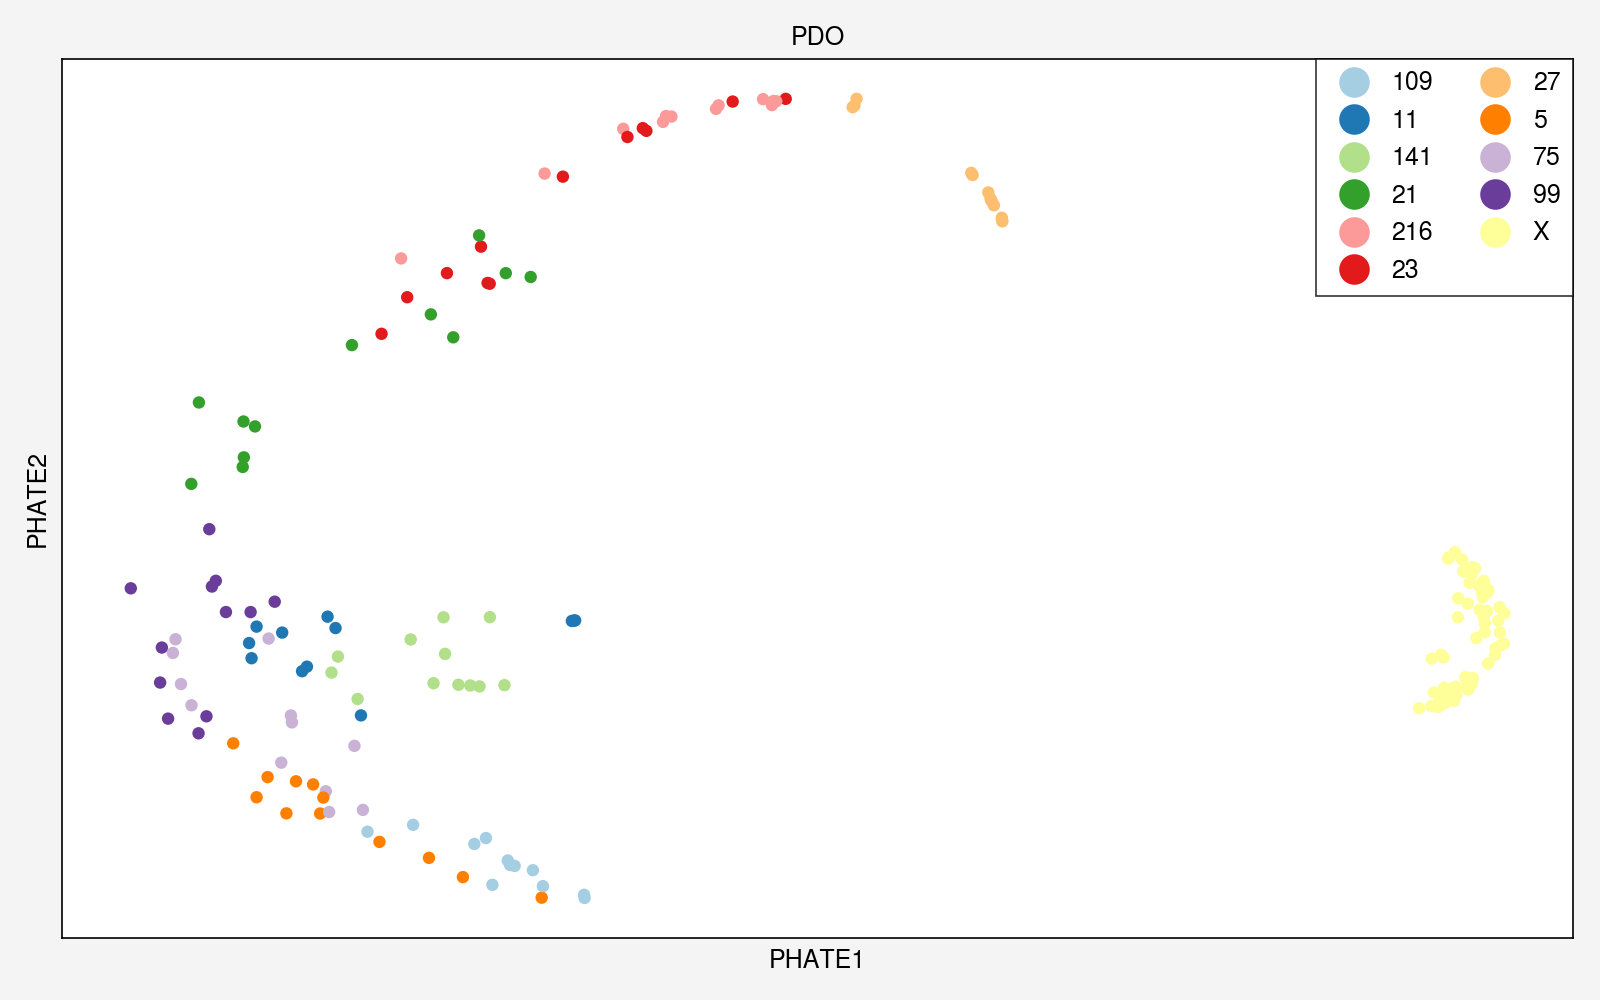

In [23]:
phate_op = phate.PHATE(t=5, knn=5,random_state=13, mds_solver="smacof", verbose=True)

data_phate = phate_op.fit_transform(data)
data_phate = pd.DataFrame(data_phate, index=data.index)


scprep.plot.scatter2d(data_phate, c=cocul_emd_df_AIC['Patient'], cmap='Paired',
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(8,5), title='PDO')

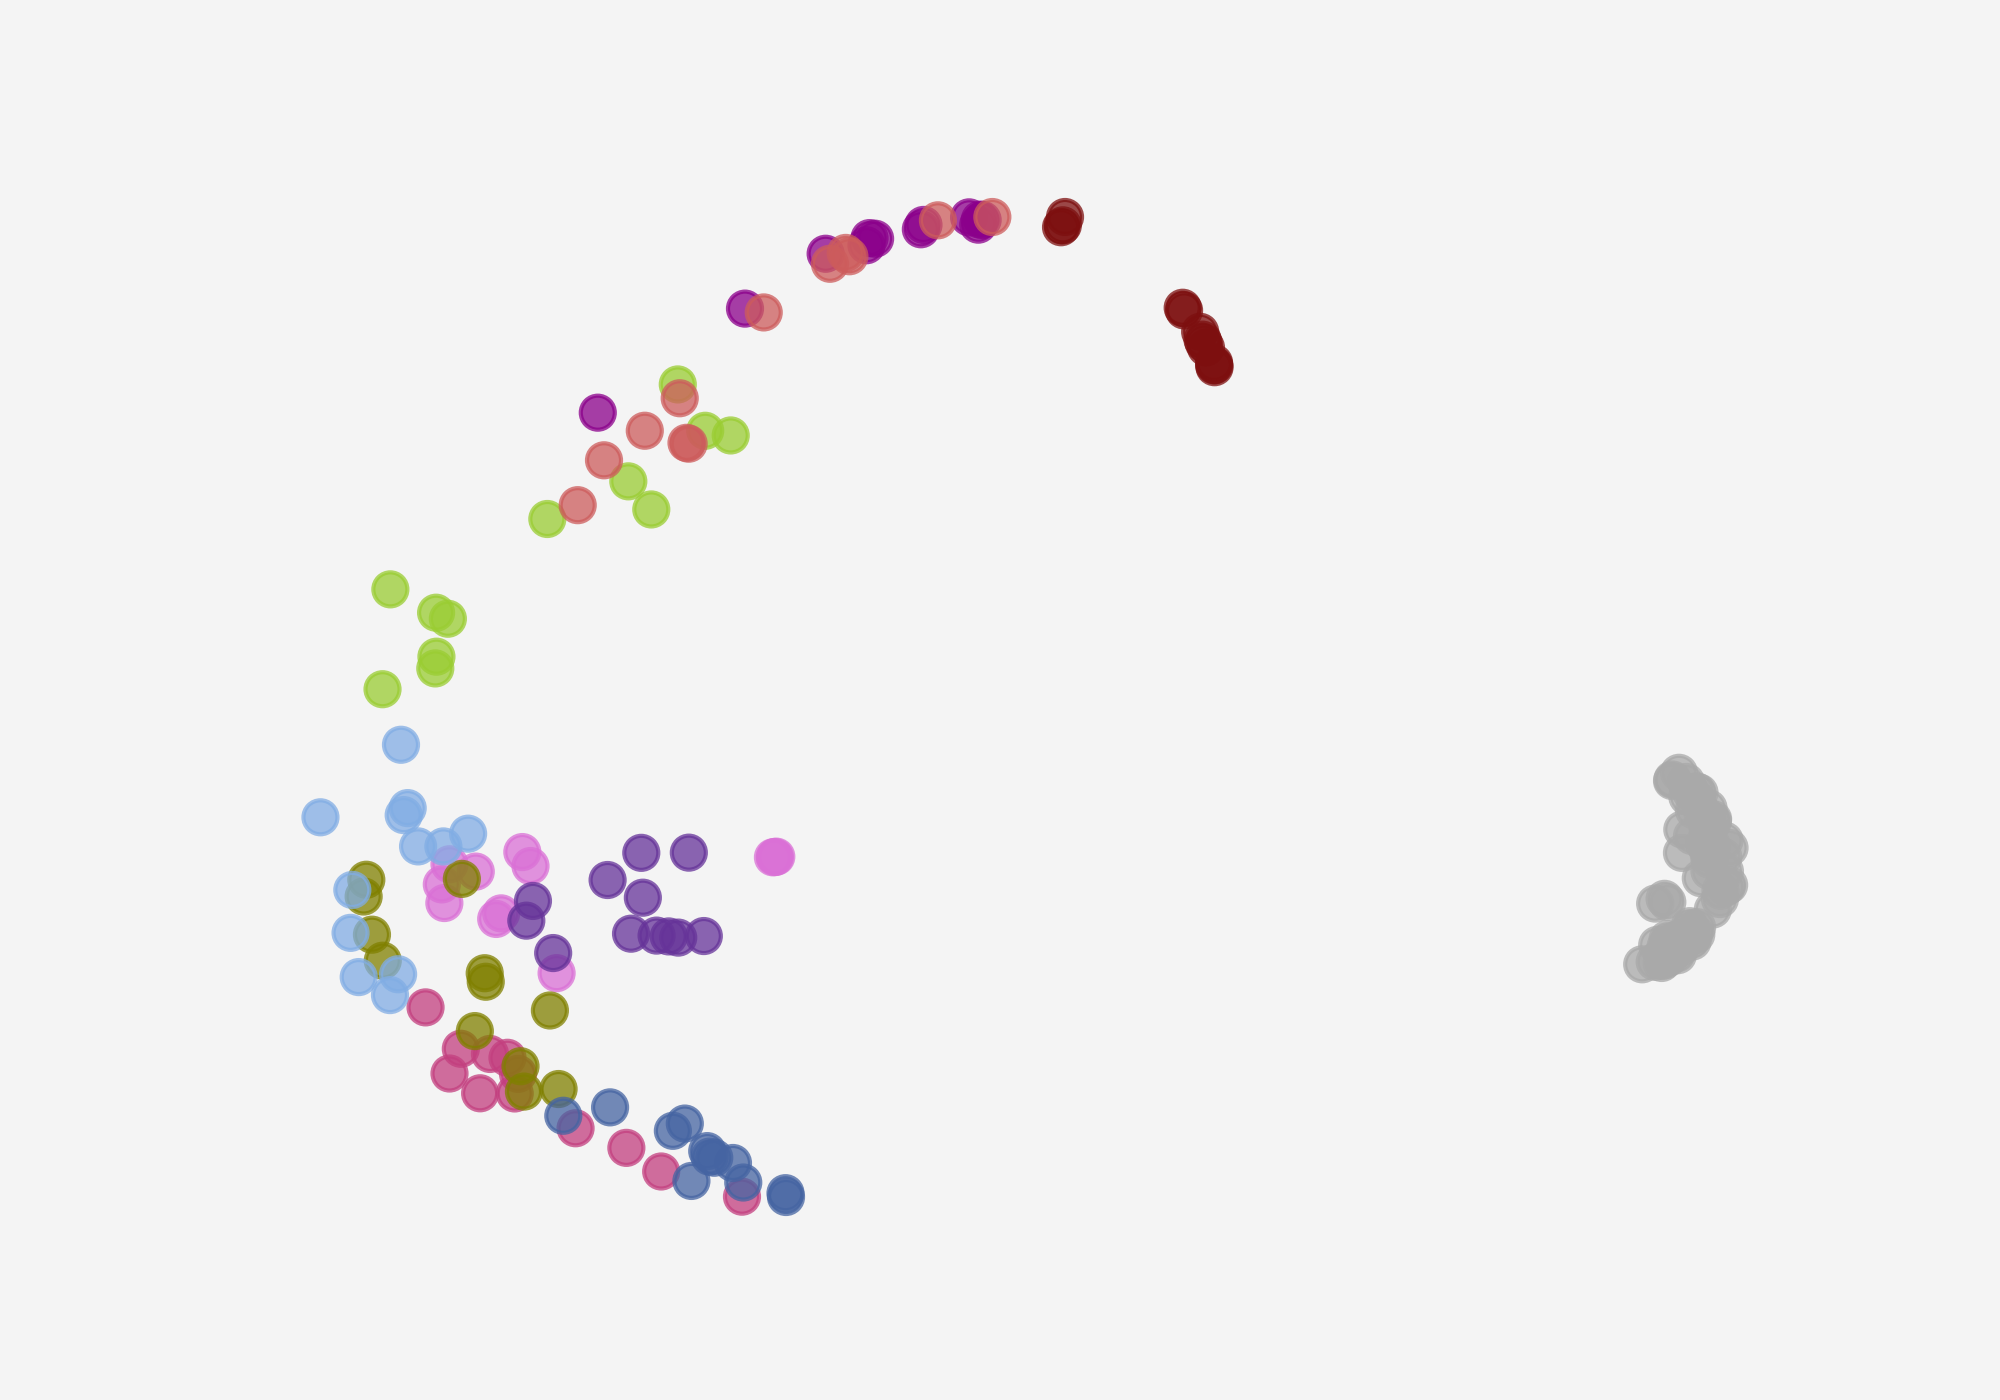

In [24]:
import matplotlib
x=data_phate.iloc[:,0]
y=data_phate.iloc[:,1]

fig, ax = plt.subplots(1, figsize=(10,7))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

patient = {'5':'#C33F7F','11':'#DA70D6','21':'#9ACD32','23':'#CD5C5C','27':'#7D0F0F','75':'#808000','99':'#81ADE4','109':'#4564A2','141':'#663399','216':'#8B008B','X':'#A9A9A9'}    
offset = mcolors.TwoSlopeNorm(vcenter=0)
colormap=pplt.Colormap('Spectral_r')

plt.scatter(x, y,s=150,alpha=0.75, c=cocul_emd_df_AIC['Patient'].map(patient), norm=offset,cmap=colormap, linewidths=1.5)
plt.axis('off')
plt.show()

In [25]:
cocul_emds_Tr=cocul_emd_df_AIC.loc[(cocul_emd_df_AIC['Culture'].isin(['PDOgd']))].groupby(
    [
         "Patient",
        "gd_donor",
        "Treatment",
        "Replicate"
    ]
,as_index=True).mean().drop(
    [
    'GFP'
    ]
,axis=1, inplace=False)

cocul_emds_PTM_all = cocul_emds_Tr.filter(['pZAP_Syk', 'pSLP76','pNFkB','pERK','pSTAT3','pSTAT5','pBTK','pSRC','pNDRG1','pH2AX','p120-catenin','Beta-catenin'])
cocul_emds_IdU_GranB = cocul_emds_Tr.filter(['IdU','GranzymeB'])


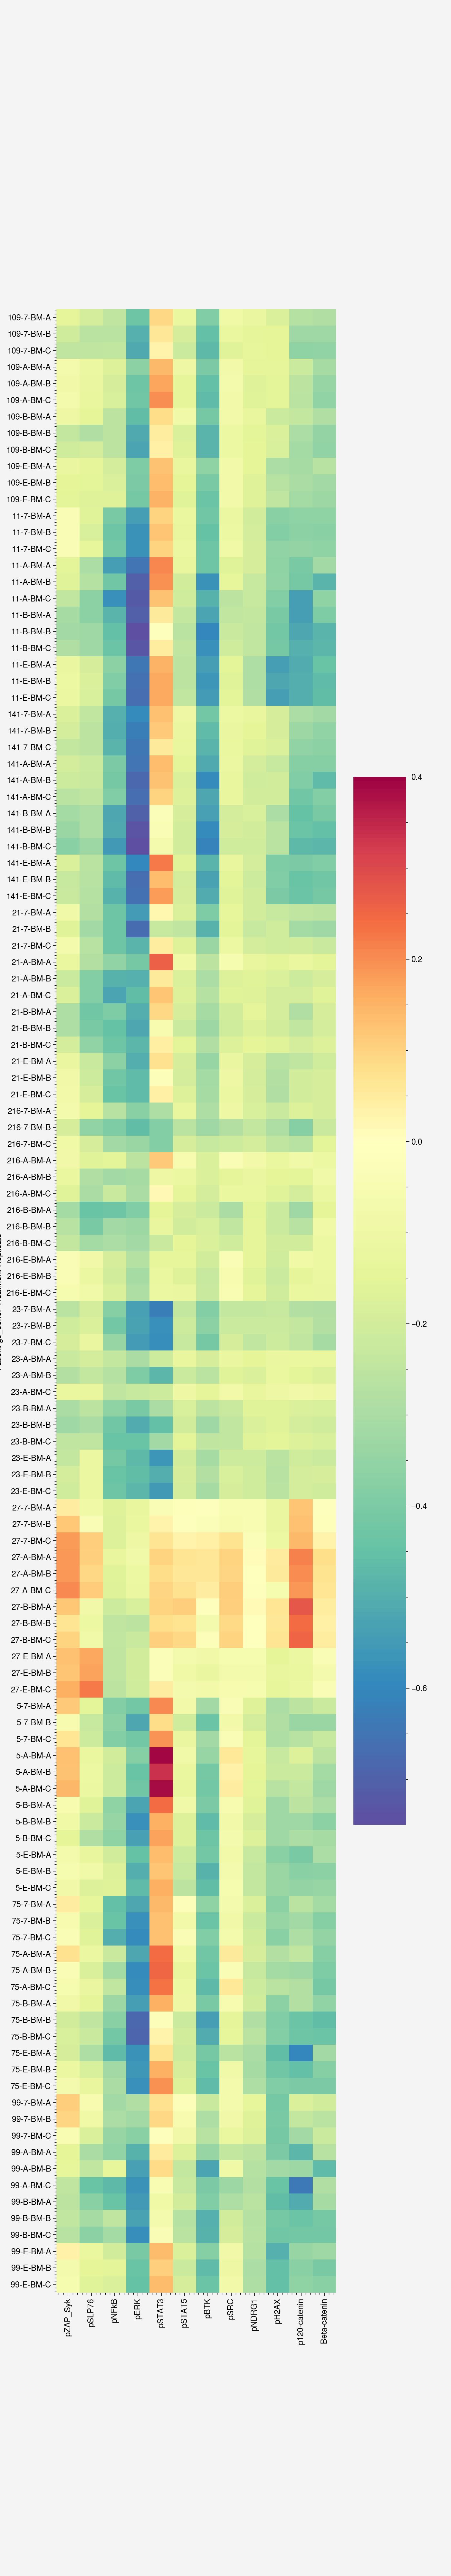

In [26]:
fig, ax = plt.subplots(figsize=(7, 40))
colormap=pplt.Colormap('Spectral_r')
offset = mcolors.TwoSlopeNorm(vcenter=-0,vmax=0.4,vmin=-0.75)
seaborn.heatmap(cocul_emds_PTM_all, cmap=colormap, norm=offset)

plt.show()

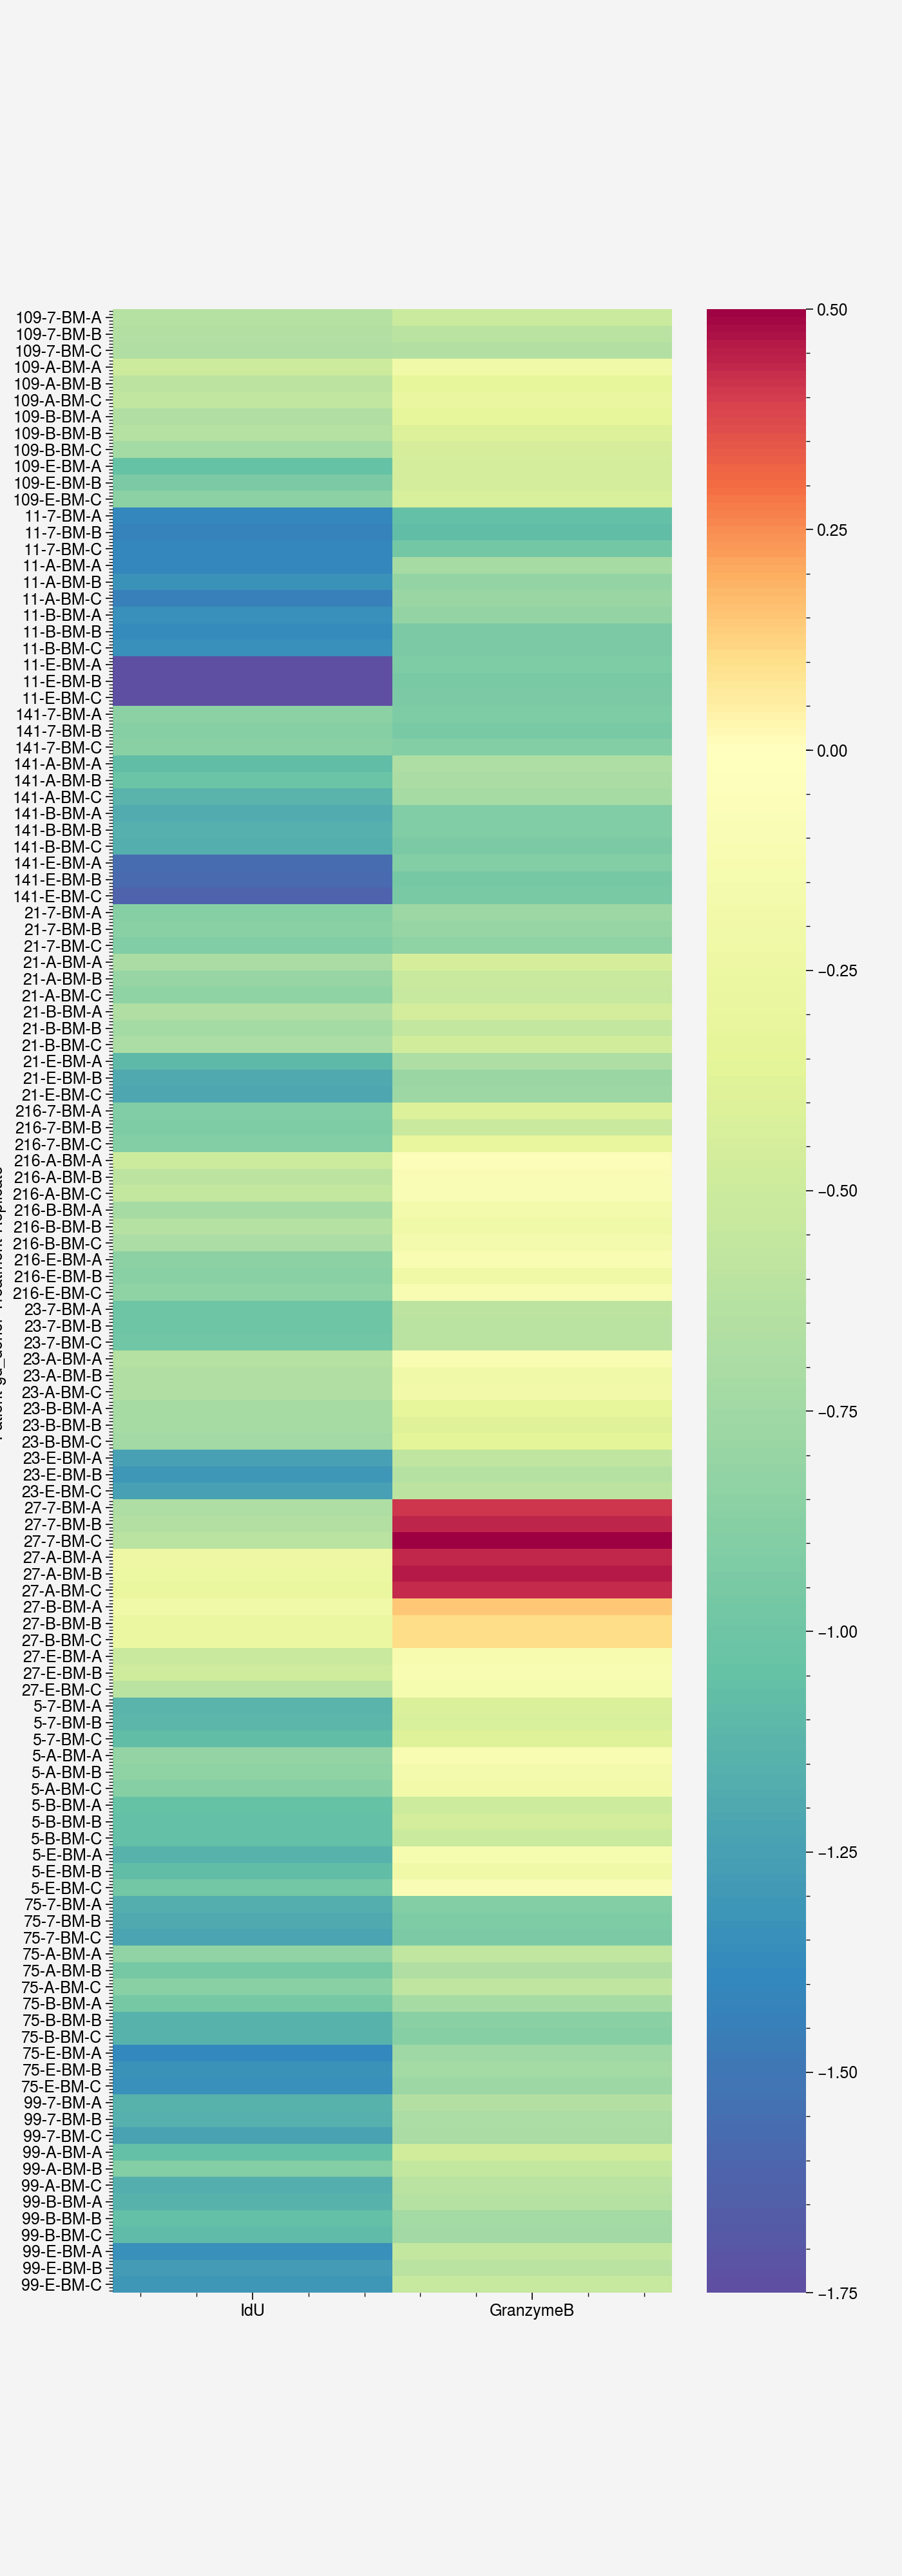

In [27]:
fig, ax = plt.subplots(figsize=(7, 20))
colormap=pplt.Colormap('Spectral_r')
offset = mcolors.TwoSlopeNorm(vcenter=-0,vmax=0.5,vmin=-1.75)
seaborn.heatmap(cocul_emds_IdU_GranB, cmap=colormap, norm=offset)

plt.show()